In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import colombia_weather
import prepare
import explore

In [4]:
import seaborn as sns
%matplotlib inline
import pylab as pl
import warnings
warnings.filterwarnings("ignore")

In [5]:
#matplot lib needs this to avoid datatype error with pandas
pd.plotting.register_matplotlib_converters()

In [6]:
df = prepare.get_data()

In [ ]:
blob.tail()

In [ ]:
df = pd.read_csv("psd_coffee.csv")

In [ ]:
df = df[df.Country_Name == "Colombia"]

In [ ]:
df.dtypes

In [ ]:
df[df.Market_Year == 2015]

In [ ]:
import colombia_weather

In [ ]:
pd.DataFrame.from_dict(colombia_weather.stations,orient="index")

In [ ]:
from colombia_weather import weather_stations

In [ ]:
colombia_weather.weather_stations

In [ ]:
colombia_weather.get_weather()

In [ ]:
df = pd.read_csv("coffee_data/coffee.csv")

In [ ]:
df.price_adjusted_inflation.plot()

In [ ]:
df

In [ ]:
df.date = df.date.apply(pd.to_datetime)

In [ ]:
df.set_index('date',inplace=True)

In [ ]:
df.price_adjusted_inflation.plot()
plt.title("Price of coffee 1958-")

In [ ]:
import plotly
import pandas as pd
import plotly.graph_objects as go

In [ ]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

In [ ]:
years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002","2007"]

In [ ]:
continents = list(dataset['continent'].unique())

In [ ]:
fig_dict = {
    "data": [],
    "layout":{},
    "frames": []
    }

In [ ]:
fig_dict['layout']['xaxis'] = {"range": [30,85],'title':'Life Expactancy'}

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
 
# basic sankey chart
Sankey(flows=[1, -0.20, -0.15, -0.05, -0.50, -0.10], labels=['Colombia', 'First', 'Second', 'Third', 'Fourth', 'Fifth'], orientations=[0, 1, -1, -1, 0,1]).finish()
plt.title("Sankey diagram with default settings")


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Sankey(
    arrangement = "snap",
    node = {
        "label": ["A", "B", "C", "D", "E", "F"],
        "x": [0.5, 0.1, 0.5, 0.7, 0.3, 0.5],
        "y": [0.7, 0.5, 0.2, 0.4, 0.2, 0.3],
        'pad':10},  # 10 Pixels 
    link = {
        "source": [0, 0, 1, 2, 5, 4, 3, 5],
        "target": [5, 3, 4, 3, 0, 2, 2, 3],
        "value": [1, 2, 1, 1, 1, 1, 1, 2]}))

fig.show()

In [ ]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label']
  ))])

fig.update_layout(
    hovermode = 'x',
    title="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
    font=dict(size = 10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()

In [ ]:
country_code = pd.read_json('coffee_data/country_codes.json')

In [ ]:
country_code.columns = ['country','dest']

In [ ]:
country_code

In [ ]:
coffee_export_by_country = pd.read_csv("coffee_data/coffee_export_numbers.csv")

In [ ]:
coffee_export_by_country.shape

In [ ]:
coffee_export_by_country = pd.merge(coffee_export_by_country,country_code,on="dest",how="outer")

In [ ]:
coffee_export_by_country.to_csv("coffee_data/coffee_export_by_country.csv")

In [ ]:
df = pd.read_csv('coffee_data/coffee_export_by_country.csv')

In [ ]:
df.shape

In [ ]:
df = colombia_weather.get_weather()

In [ ]:
df[df.PRCP >=0].shape[0]/df.shape[0]

In [ ]:
df[df.DATE > '1990-01-01'].head(5)

In [ ]:
df.DATE = pd.to_datetime(df.DATE)
df["DATE2"] = df.DATE

In [ ]:
df.dtypes

In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
stations = df.NAME.unique()

In [ ]:
station_activity = pd.DataFrame(df.NAME.unique(),columns=['station_name'])

In [ ]:
station_activity.head(2)

In [ ]:
station_activity = station_activity.sort_values(by='station_name').set_index('station_name')

In [ ]:
station_activity.head()

In [ ]:
station_activity = pd.concat([station_activity,df.sort_values(by='NAME').groupby("NAME")['DATE2'].min()],axis=1).rename(columns={"DATE2":"first_date_record"})
station_activity = pd.concat([station_activity,df.sort_values(by='NAME').groupby("NAME")['DATE2'].max()],axis=1).rename(columns={"DATE2":"last_date_record"})

In [ ]:
station_activity

In [ ]:
grouper = df.groupby([pd.Grouper(freq='1M'),'NAME'])

In [ ]:
grouper = grouper.mean().reset_index(level='NAME')

In [ ]:
grouper.groupby([pd.Grouper(freq='Y')])

In [ ]:
year_1960 = grouper[grouper.index < '1961-01-01']

In [ ]:
year_1960.NAME.nunique()

In [ ]:
grouper.groupby([pd.Grouper(freq='Y')])['NAME'].nunique()

In [ ]:
def weather_stations_by_year():
    df = colombia_weather.get_weather()
    df.DATE = pd.to_datetime(df.DATE)
    df.set_index('DATE',inplace=True)
    return df.groupby([pd.Grouper(freq='Y')])['NAME'].nunique()

In [ ]:
df = weather_stations_by_year()

In [ ]:
df = prepare.get_data()

In [ ]:
weather_stations = pd.DataFrame.from_dict(colombia_weather.weather_stations,orient='index')

In [ ]:
weather_stations = weather_stations.sort_index()

In [ ]:
station_dates = pd.concat([weather_stations,station_activity],axis=1)

In [ ]:
station_dates = station_dates.dropna().rename(columns = {0: "department"})

In [ ]:
station_dates.sort_values(by='first_date_record')

In [ ]:
station_dates.to_csv('weather_data/station_dates.csv')

In [ ]:
blob = pd.read_csv('coffee_data/coffee_export_by_country.csv')

In [ ]:
df = prepare.get_data()

In [ ]:
df.head(5)

In [ ]:
weather_stations = pd.DataFrame.from_dict(colombia_weather.weather_stations,orient="index")

In [ ]:
weather_stations.reset_index(inplace=True)
df.reset_index(inplace=True)

In [ ]:
weather_stations

In [ ]:
df.shape

In [ ]:
station_dates = pd.merge(df,weather_stations,how='left',left_on='region',right_on=0)

In [ ]:
weather_stations.shape

In [ ]:
station_dates.set_index('date',inplace=True)

In [ ]:
station_dates.head(2)

In [ ]:
station_activity = pd.DataFrame(station_dates.region.unique())

In [ ]:
station_activity.dropna(inplace=True)

In [ ]:
station_activity.columns = ['region']

In [ ]:
station_activity

In [ ]:
df.reset_index(inplace=True)
df.head(2)

In [ ]:
station_activity = pd.concat([station_activity,df.sort_values(by='region').groupby("region")['date'].min()],axis=1).rename(columns={"date":"first_date_record"})
station_activity = pd.concat([station_activity,df.sort_values(by='region').groupby("region")['date'].max()],axis=1).rename(columns={"date":"last_date_record"})

In [ ]:
station_activity = station_activity.iloc[13:].drop(columns='region')

In [ ]:
station_activity.to_csv('weather_data/station_dates.csv')

In [ ]:
df = prepare.get_weather()

In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
df.head(2)

In [ ]:
df.groupby(['STATION','')

In [ ]:
df.columns.apply(lower)

In [ ]:
df.columns = map(str.lower, df.columns)

In [ ]:
df

In [ ]:
df = prepare.get_data()

In [ ]:
df = df.sort_values(by='region').sort_index()

In [ ]:
df.tail(30)

In [ ]:
df[df.mean_temp.isna()].shape

In [ ]:
mean_temp = df[['region','mean_temp']]

In [ ]:
mean_temp.head(20)

In [ ]:
mean_temp['prior_year_mean_temp'] = mean_temp.mean_temp.diff(periods=12)

In [ ]:
mean_temp.head(30)

In [ ]:
df.index.nunique()

In [ ]:
mean_temp.reset_index(inplace=True)

In [ ]:
mean_temp['unique'] = mean_temp.date.map(str) + mean_temp.region

In [ ]:
mean_temp.dtypes

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.region.unique()

In [ ]:
#for r in df.region.unique():
df[df.region == "Narino"].quantity.plot()

In [ ]:
grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])

In [ ]:
region_quantity = grouper.mean()

In [ ]:
region_quantity.columns

In [ ]:
region_quantity = region_quantity.reset_index()

In [ ]:
region_quantity.set_index('date',inplace=True)

In [ ]:
region_quantity

In [ ]:
def production_by_region(df):
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_quantity = grouper.mean()
    for c in region_quantity.columns:
        region_quantity = group.c.mean()
        region_quantity = region_quantity.reset_index()
        region_quantity.set_index('date',inplace=True)

        print("Top Coffee Producing Regions of Colombia")
        for r in region_quantity.region.unique():
            region_quantity[region_quantity.region == r].quantity.plot()
            plt.title("Thousands of 60kg bags produced by " + r)
            plt.ylabel("Thousands of 60kg bags")
            plt.xlabel("Year")
            plt.show()

In [ ]:
production_by_region(df)

In [ ]:
def production_by_region(df):
    
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_quantity = grouper.quantity.sum()
    region_quantity = region_quantity.reset_index()
    region_quantity.set_index('date',inplace=True)

    print("Top Coffee Producing Regions of Colombia")
    for r in region_quantity.region.unique():
        region_quantity[region_quantity.region == r].quantity.plot()
        plt.title("Thousands of 60kg bags produced by " + r)
        plt.ylabel("Thousands of 60kg bags")
        plt.xlabel("Year")
        plt.show()

In [ ]:
production_by_region(df)

In [ ]:
def precipitation_by_region(df):
    
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_precip = grouper.mean_precip.sum()
    region_precip = region_precip.reset_index()
    region_precip.set_index('date',inplace=True)

    print("Average precipitation by Region of Colombia")
    for r in region_precip.region.unique():
        region_precip[region_precip.region == r].mean_precip.plot()
        plt.title("Average Precipitation in mm " + r)
        plt.ylabel("Avg Precipitation (mm)")
        plt.xlabel("Year")
        plt.show()

In [ ]:
precipitation_by_region(df)

In [ ]:
def avg_temp_by_region(df):
    
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_precip = grouper.mean_precip.sum()
    region_precip = region_precip.reset_index()
    region_precip.set_index('date',inplace=True)

    print("Average precipitation by Region of Colombia")
    for r in region_precip.region.unique():
        region_precip[region_precip.region == r].mean_precip.plot()
        plt.title("Average Precipitation in mm " + r)
        plt.ylabel("Avg Precipitation (mm)")
        plt.xlabel("Year")
        plt.show()

In [ ]:
df = prepare.get_data()

In [ ]:
explore.production_by_region(df)
#df[df.index=='1971-04-01']

In [ ]:
df.region.unique()

In [ ]:
df[pd.isna(df.region)]

In [ ]:
df = df[df.index != '1971-04-01']

In [ ]:
df.shape

In [ ]:
df = df[df.index != '1971-04-01']
grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
region_quantity = grouper.quantity.sum()
region_quantity = region_quantity.reset_index()

In [ ]:
df = prepare.get_prepped()

In [ ]:
outliers = pd.DataFrame(df.groupby([pd.Grouper(freq='1Y')])['inflated'].mean())

In [ ]:
max_inflated = pd.DataFrame(df.groupby([pd.Grouper(freq='1Y')])['inflated'].max()).rename(columns={'inflated':'max_inflated'})

In [ ]:
min_inflated = pd.DataFrame(df.groupby([pd.Grouper(freq='1Y')])['inflated'].min()).rename(columns={'inflated':'min_inflated'})

In [ ]:
outliers = pd.merge(outliers,max_inflated,left_index=True,right_index=True)

In [ ]:
outliers = pd.merge(outliers,min_inflated,left_index=True,right_index=True)

In [ ]:
blob = explore.price_outliers(df)

In [ ]:
blob91 = blob['1991':]

In [ ]:
sns.distplot(df.inflated["1991":])

In [ ]:
sns.distplot(blob91.inflated)

In [ ]:
blob91.inflated.plot()

In [ ]:
blob91.inflated.mean()

In [ ]:
blob91.sort_values(by='inflated').head()

In [11]:
blob = df['1991':]

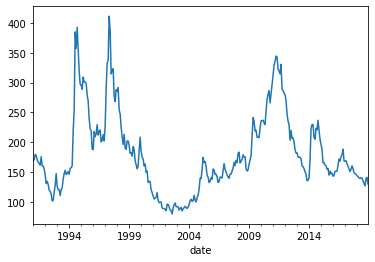

In [12]:
blob.inflated.plot()

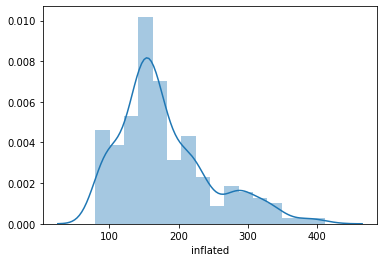

In [13]:
sns.distplot(blob.inflated)

In [14]:
df.inflated.std()

161.81297306181773

In [15]:
blob['std'] = blob.inflated.std()

In [16]:
blob['mean'] = blob.inflated.mean()

In [17]:
blob['dist_from_mean'] = blob['inflated'] - blob['mean']

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [18]:
blob = blob[['quantity','inflated','std','mean','dist_from_mean']]

In [19]:
blob

,quantity,inflated,std,mean,dist_from_mean
date,,,,,
1991-01-01,1212.0,168.750541,66.872015,179.719479,-10.968938
1991-02-01,777.0,170.483585,66.872015,179.719479,-9.235894
1991-03-01,494.0,179.406918,66.872015,179.719479,-0.312561
1991-04-01,1637.0,177.471071,66.872015,179.719479,-2.248408
1991-05-01,1704.0,170.243909,66.872015,179.719479,-9.475570
...,...,...,...,...,...
2018-08-01,1258.0,130.993226,66.872015,179.719479,-48.726253
2018-09-01,1050.0,126.525333,66.872015,179.719479,-53.194146
2018-10-01,1086.0,138.804516,66.872015,179.719479,-40.914963


In [20]:
spike_years = ['1994-09-01','1997-05-01','2002-08-01','2011-04-01','2011-09-01','1995-03-01','2011-09-01']
blob[blob.dist_from_mean.abs() > (blob['std'] *1.5)]

,quantity,inflated,std,mean,dist_from_mean
date,,,,,
1994-07-01,782.0,385.081565,66.872015,179.719479,205.362086
1994-08-01,529.0,357.361521,66.872015,179.719479,177.642042
1994-09-01,681.0,392.892653,66.872015,179.719479,213.173174
1994-10-01,1530.0,354.531907,66.872015,179.719479,174.812428
1994-11-01,1764.0,319.102438,66.872015,179.719479,139.382959
1994-12-01,1404.0,297.160227,66.872015,179.719479,117.440748
1995-01-01,832.0,295.726275,66.872015,179.719479,116.006796
1995-02-01,924.0,288.723619,66.872015,179.719479,109.004140
1995-03-01,456.0,309.220805,66.872015,179.719479,129.501326


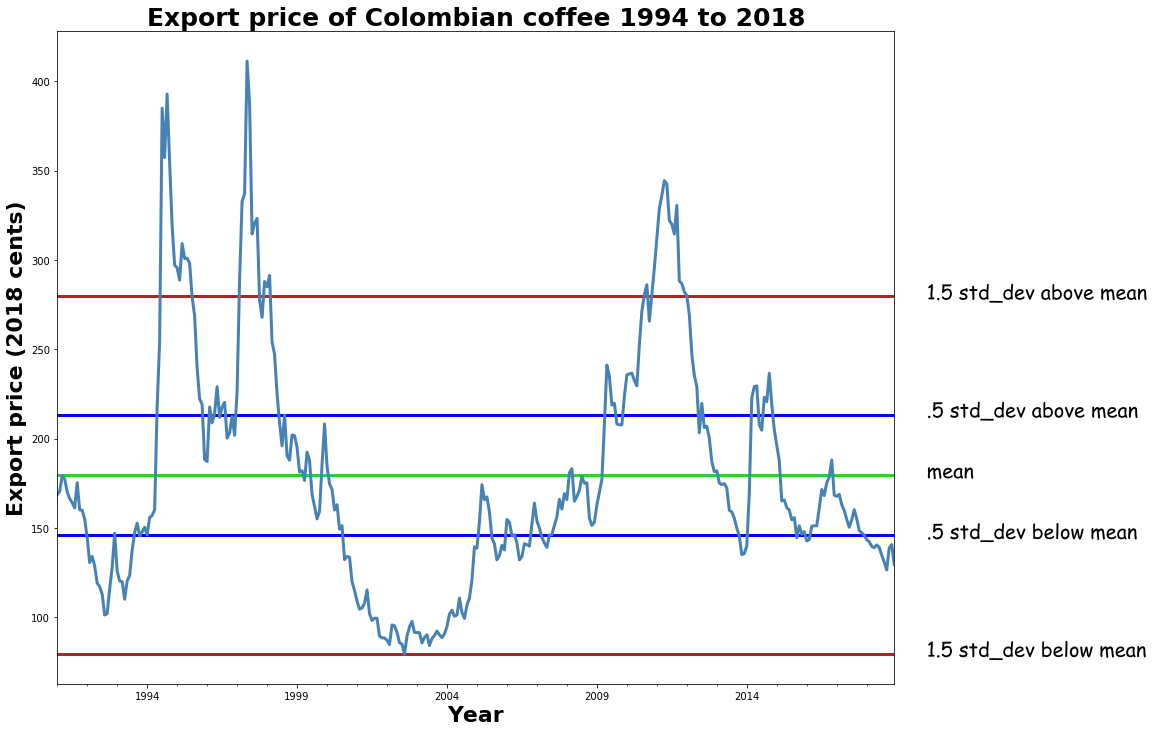

In [21]:
inflated_mean = blob.inflated.mean()
plt.figure(figsize=(15,12))
blob.inflated.plot(linewidth=3,color='steelblue')

plt.hlines(blob['inflated'].mean(),0,4000,color='limegreen',linewidth=3)
plt.hlines(blob['mean'] + (blob['std'] * 1.5),0,4000,color='firebrick',linewidth=3)
plt.hlines(blob['mean'] - (blob['std'] * 1.5),0,4000,color='firebrick',linewidth=3)
plt.hlines(blob['mean'] + (blob['std'] * .5),0,4000,color='b',linewidth=3)
plt.hlines(blob['mean'] - (blob['std'] * .5),0,4000,color='b',linewidth=3)
plt.ylabel("Export price (2018 cents)",size=22,weight='bold')
plt.xlabel("Year",size=22,weight='bold')
plt.title("Export price of Colombian coffee 1994 to 2018",size=25,weight='bold')
std_dev_above = "1.5 std_dev above mean"
std_dev_below = "1.5 std_dev below mean"
std_dev_below_half = ".5 std_dev below mean"
std_dev_above_half = ".5 std_dev above mean"

plt.xkcd()

pl.text(600,278,std_dev_above,size=20)
pl.text(600,78,std_dev_below,size=20)
pl.text(600,178,"mean",size=20)
pl.text(600,144,std_dev_below_half,size=20)
pl.text(600,212,std_dev_above_half,size=20)
plt.show()

In [ ]:
blob[blob.inflated == blob.inflated.min()]

In [23]:
def export_price_1991_2018(df):

    blob = df['1991':]
    blob['std'] = blob.inflated.std()
    blob['mean'] = blob.inflated.mean()
    blob['dist_from_mean'] = blob['inflated'] - blob['mean']
    blob = blob[['quantity','inflated','std','mean','dist_from_mean']]

    inflated_mean = blob.inflated.mean()
    plt.figure(figsize=(15,12))
    blob.inflated.plot(linewidth=3,color='steelblue')

    plt.hlines(blob['inflated'].mean(),0,4000,color='limegreen',linewidth=3)
    plt.hlines(blob['mean'] + (blob['std'] * 1.5),0,4000,color='firebrick',linewidth=3)
    plt.hlines(blob['mean'] - (blob['std'] * 1.5),0,4000,color='firebrick',linewidth=3)
    plt.hlines(blob['mean'] + (blob['std'] * .5),0,4000,color='b',linewidth=3)
    plt.hlines(blob['mean'] - (blob['std'] * .5),0,4000,color='b',linewidth=3)
    plt.ylabel("Export price (2018 cents)",size=22,weight='bold')
    plt.xlabel("Year",size=22,weight='bold')
    plt.title("Export price of Colombian coffee 1994 to 2018",size=25,weight='bold')
    std_dev_above = "1.5 std_dev above mean"
    std_dev_below = "1.5 std_dev below mean"
    std_dev_below_half = ".5 std_dev below mean"
    std_dev_above_half = ".5 std_dev above mean"

    pl.text(600,278,std_dev_above,size=20)
    pl.text(600,78,std_dev_below,size=20)
    pl.text(600,178,"mean",size=20)
    pl.text(600,144,std_dev_below_half,size=20)
    pl.text(600,212,std_dev_above_half,size=20)
    plt.show()

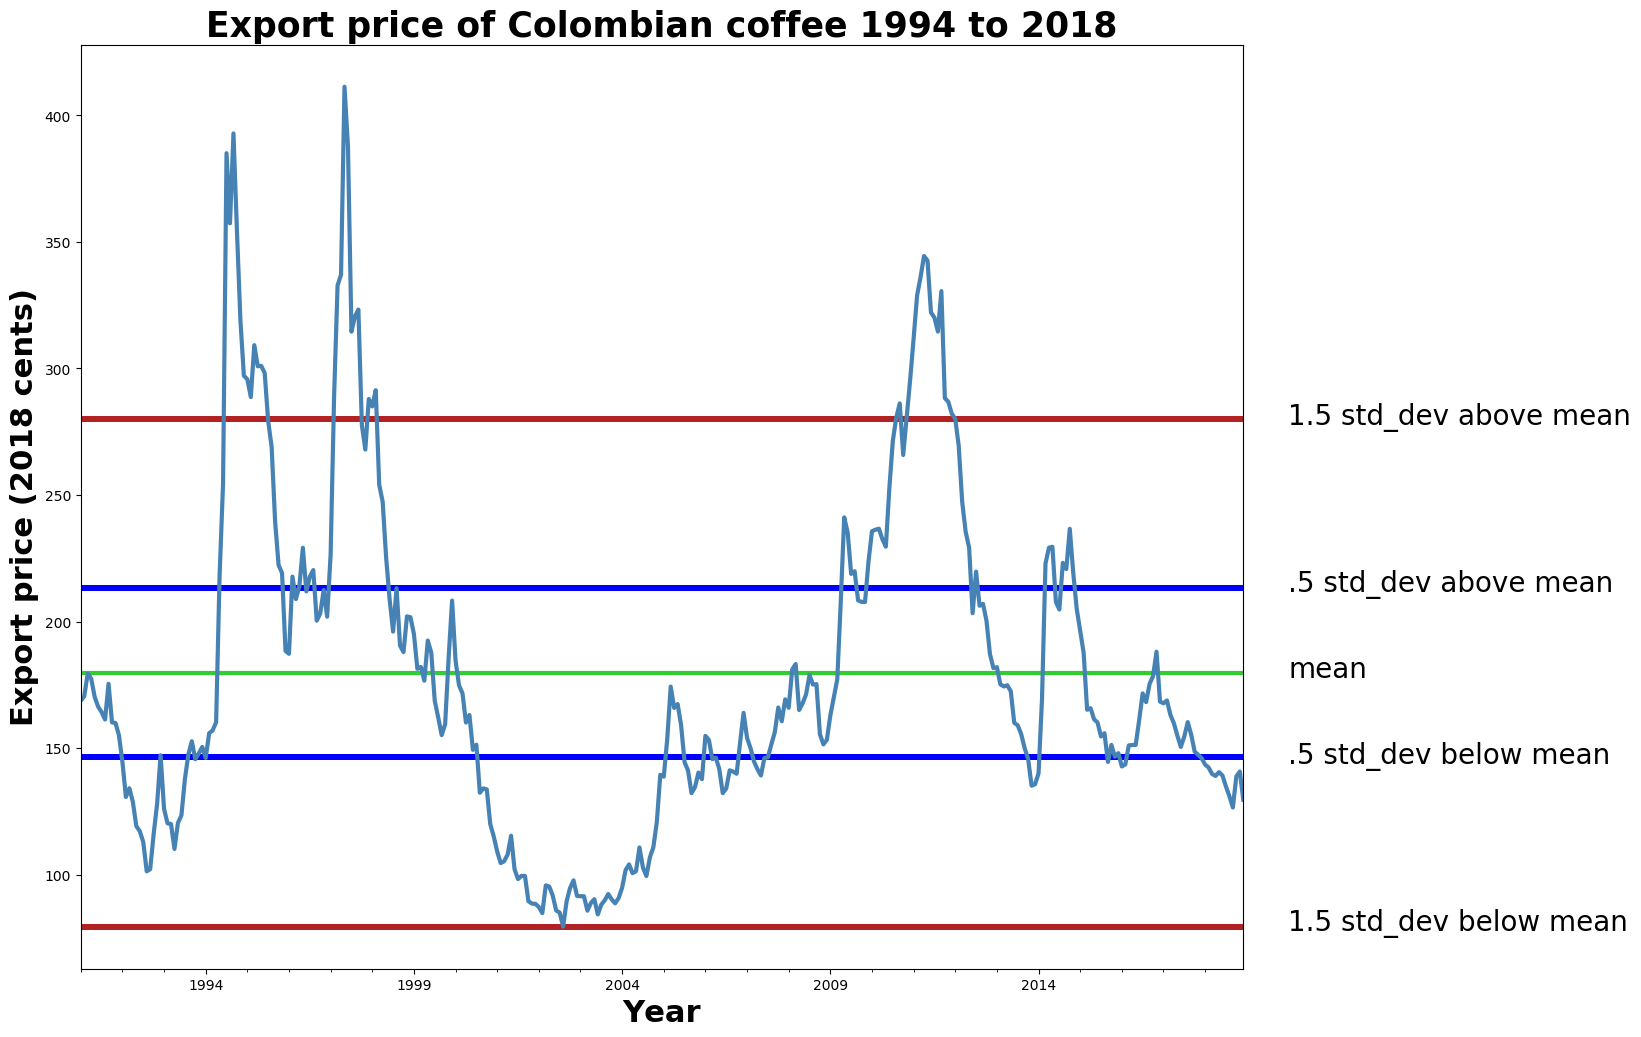

In [59]:
export_price_1991_2018(df)

In [25]:
spike_years = ['1994-09-01','1997-05-01','2002-08-01','2011-04-01','2011-09-01','1995-03-01','2011-09-01']

In [26]:
spike_years = pd.DataFrame(spike_years)

In [27]:
spike_years = pd.to_datetime(spike_years[0])

In [28]:
spike_years.sort_values(inplace=True)

In [29]:
spike_years.columns = ['spike_year']

In [30]:
spike_years

0   1994-09-01
5   1995-03-01
1   1997-05-01
2   2002-08-01
3   2011-04-01
4   2011-09-01
6   2011-09-01
Name: 0, dtype: datetime64[ns]

In [31]:
blob['1994':].head(20)
blob['half_std_dev'] = blob['mean'] + (blob['std'] * .5)
blob['1994':].head(40)

,quantity,inflated,std,mean,dist_from_mean,half_std_dev
date,,,,,,
1994-01-01,829.0,146.089376,66.872015,179.719479,-33.630103,213.155486
1994-02-01,945.0,155.882888,66.872015,179.719479,-23.836591,213.155486
1994-03-01,840.0,157.001178,66.872015,179.719479,-22.718301,213.155486
1994-04-01,967.0,160.220499,66.872015,179.719479,-19.498980,213.155486
1994-05-01,819.0,218.083549,66.872015,179.719479,38.364070,213.155486
1994-06-01,941.0,254.427983,66.872015,179.719479,74.708504,213.155486
1994-07-01,782.0,385.081565,66.872015,179.719479,205.362086,213.155486
1994-08-01,529.0,357.361521,66.872015,179.719479,177.642042,213.155486
1994-09-01,681.0,392.892653,66.872015,179.719479,213.173174,213.155486


In [ ]:
drop_to_mean_date = ['1995-12-01',]

In [32]:
blob['spike_year'] = blob['mean'] + (blob['std']*2) < blob['inflated']

In [49]:
blob[blob['spike_year'] == True]
blob['within_norm'] = (blob['inflated'] < (blob['mean'] + (blob['std']*.5))) & (blob['inflated'] > (blob['mean'] - (blob['std']*.5))) 


In [34]:
print(179.71-(66.87 *.5))
print(179.71+(66.87 *.5))

146.275
213.145


In [35]:
blob[(blob.inflated >144) & (blob.inflated < 215)].sort_values(by='inflated').tail(40)

,quantity,inflated,std,mean,dist_from_mean,half_std_dev,spike_year,within_norm
date,,,,,,,,
2013-01-01,877.0,181.983777,66.872015,179.719479,2.264298,213.155486,False,True
1999-03-01,670.0,182.075184,66.872015,179.719479,2.355705,213.155486,False,True
2008-03-01,872.0,183.222448,66.872015,179.719479,3.502969,213.155486,False,True
2000-01-01,658.0,184.553437,66.872015,179.719479,4.833958,213.155486,False,True
1999-11-01,882.0,185.556919,66.872015,179.719479,5.837440,213.155486,False,True
2012-11-01,770.0,187.132466,66.872015,179.719479,7.412987,213.155486,False,True
1996-01-01,2081.0,187.265966,66.872015,179.719479,7.546487,213.155486,False,True
2015-02-01,1029.0,187.612588,66.872015,179.719479,7.893109,213.155486,False,True
1999-06-01,740.0,187.727352,66.872015,179.719479,8.007873,213.155486,False,True


In [56]:
blob['2004':].head(50)

,quantity,inflated,std,mean,dist_from_mean,half_std_dev,spike_year,within_norm
date,,,,,,,,
2004-01-01,1171.0,94.811664,66.872015,179.719479,-84.907815,213.155486,False,False
2004-02-01,770.0,101.808782,66.872015,179.719479,-77.910697,213.155486,False,False
2004-03-01,811.0,104.029369,66.872015,179.719479,-75.690110,213.155486,False,False
2004-04-01,738.0,100.580605,66.872015,179.719479,-79.138874,213.155486,False,False
2004-05-01,1091.0,101.349734,66.872015,179.719479,-78.369745,213.155486,False,False
2004-06-01,954.0,110.740092,66.872015,179.719479,-68.979387,213.155486,False,False
2004-07-01,774.0,102.777672,66.872015,179.719479,-76.941807,213.155486,False,False
2004-08-01,722.0,99.423947,66.872015,179.719479,-80.295532,213.155486,False,False
2004-09-01,465.0,106.806659,66.872015,179.719479,-72.912820,213.155486,False,False


In [37]:
spike_years = pd.DataFrame(spike_years[0:6])

In [57]:
within_norm = ['1995-12-01','1995-12-01','1998-06-01','2005-02-01','2012-06-01','2012-06-01']
blob['2009':].head(40)

,quantity,inflated,std,mean,dist_from_mean,half_std_dev,spike_year,within_norm
date,,,,,,,,
2009-01-01,876.0,162.894821,66.872015,179.719479,-16.824658,213.155486,False,True
2009-02-01,868.0,169.971709,66.872015,179.719479,-9.747770,213.155486,False,True
2009-03-01,765.0,177.155178,66.872015,179.719479,-2.564301,213.155486,False,True
2009-04-01,345.0,207.630259,66.872015,179.719479,27.910780,213.155486,False,True
2009-05-01,702.0,241.180856,66.872015,179.719479,61.461377,213.155486,False,False
2009-06-01,685.0,235.161432,66.872015,179.719479,55.441953,213.155486,False,False
2009-07-01,582.0,218.835263,66.872015,179.719479,39.115784,213.155486,False,False
2009-08-01,397.0,219.884146,66.872015,179.719479,40.164667,213.155486,False,False
2009-09-01,467.0,208.357115,66.872015,179.719479,28.637636,213.155486,False,True


In [39]:
spike_years['return_to_norm'] = pd.Series(within_norm)


In [40]:
spike_years = spike_years.assign(return_to_norm=within_norm)


In [41]:
spike_years

,0,return_to_norm
0,1994-09-01,1995-12-01
5,1995-03-01,1995-12-01
1,1997-05-01,1998-06-01
2,2002-08-01,2005-02-01
3,2011-04-01,2012-06-01
4,2011-09-01,2012-06-01


In [42]:
spike_years[0] = pd.to_datetime(spike_years[0])
spike_years['return_to_norm'] = pd.to_datetime(spike_years['return_to_norm'])

In [43]:
spike_years['days_to_return'] = spike_years['return_to_norm'] - spike_years[0]

In [44]:
spike_years.columns = ['price_peak','return_to_norm','days_to_return']

In [45]:
spike_years.set_index('price_peak',inplace=True)

In [65]:
spike_years
breakout = ['1994-05-01','1994-05-01','1997-01-01','2000-08-01','2009-05-01','2009-05-01']

In [66]:
spike_years['breakout'] = breakout

In [71]:
spike_years = spike_years[['breakout','return_to_norm','days_to_return']]

In [81]:
spike_years.breakout = pd.to_datetime(spike_years.breakout)

In [82]:
spike_years

,breakout,return_to_norm,days_to_return
price_peak,,,
1994-09-01,1994-05-01,1995-12-01,456 days
1995-03-01,1994-05-01,1995-12-01,275 days
1997-05-01,1997-01-01,1998-06-01,396 days
2002-08-01,2000-08-01,2005-02-01,915 days
2011-04-01,2009-05-01,2012-06-01,427 days
2011-09-01,2009-05-01,2012-06-01,274 days


In [6]:
df = prepare.get_prepped()

In [8]:
blob = df["1994":]

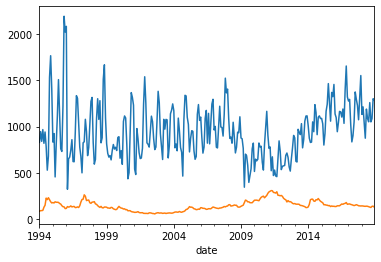

In [10]:
blob.quantity.plot()
blob.price.plot()
plt.show()

In [1]:
def production_by_region(df):
    #df = df.drop(index = '1971-04-01')
    grouper = df[df.index >= '1980-01-01'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_quantity = grouper.quantity.sum()
    region_quantity = region_quantity.reset_index()
    region_quantity.set_index('date',inplace=True)
     
    print("Top Coffee Producing Regions of Colombia")
    for r in region_quantity.region.unique():
        region_quantity[region_quantity.region == r].quantity.plot()
        plt.title("Thousands of 60kg bags produced by " + r)
        plt.ylabel("Thousands of 60kg bags")
        plt.xlabel("Year")
        plt.show()

#produces graphs of average precipitation by year and region
def precipitation_by_region(df):
    #df = df[df.index != '1971-04-01']
    grouper = df[df.index >= '1980-01-01'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_precip = grouper.mean_precip.sum()
    region_precip = region_precip.reset_index()
    region_precip.set_index('date',inplace=True)
    
    #grouper = df[df.index >= '1980-01-01'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_quantity = grouper.quantity.sum()
    region_quantity = region_quantity.reset_index()
    region_quantity.set_index('date',inplace=True)

    print("Average precipitation by Region of Colombia")
    for r in region_precip.region.unique():
        region_precip[region_precip.region == r].mean_precip.plot()
        region_quantity[region_quantity.region == r].quantity.plot()
        plt.title("Average Precipitation in cm " + r)
        plt.ylabel("Avg Precipitation (cm)")
        plt.xlabel("Year")
        plt.show()

Average precipitation by Region of Colombia


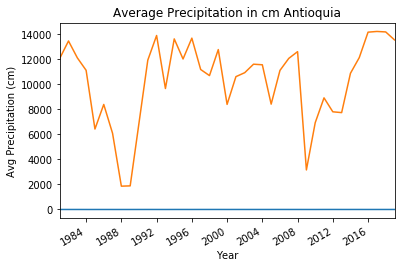

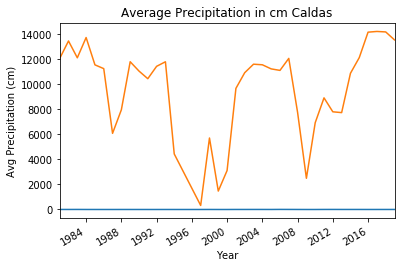

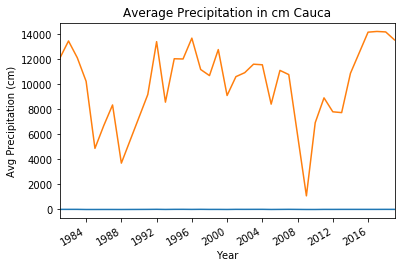

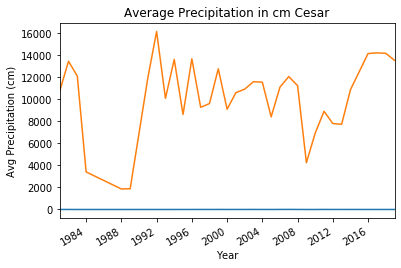

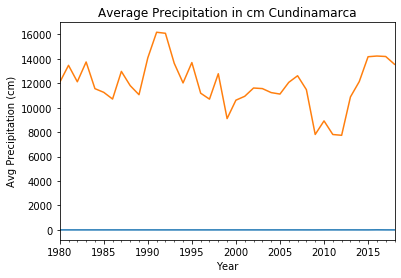

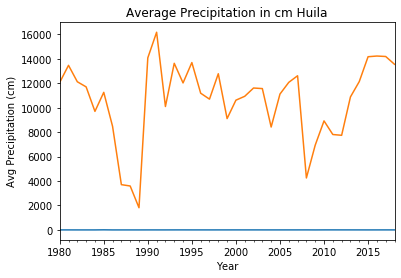

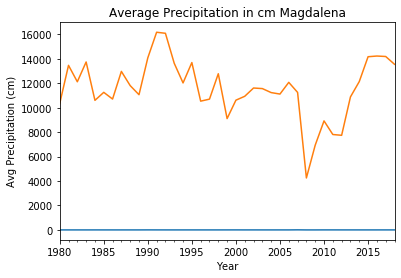

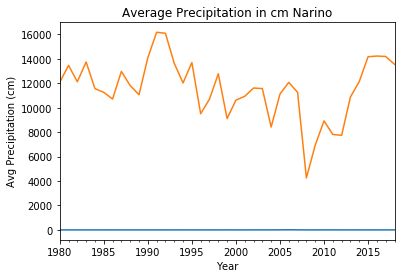

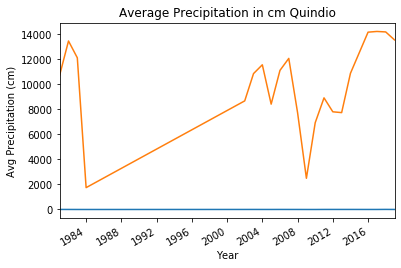

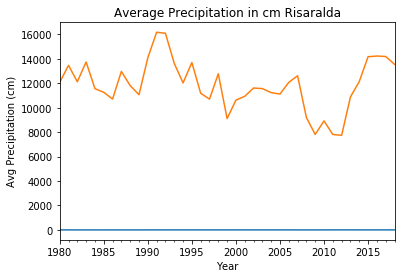

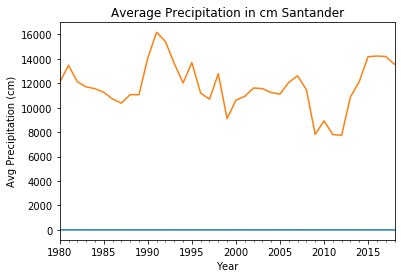

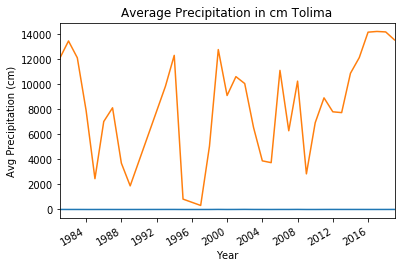

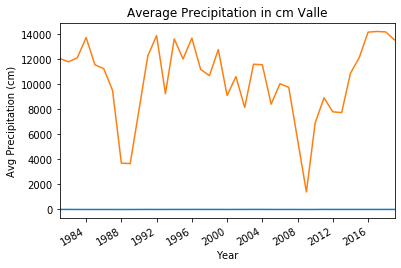

In [7]:
precipitation_by_region(df)

In [8]:
def temp_by_region(df):
    #df = df[df.index != '1971-04-01']
    grouper = df[df.index >= '1980-01-01'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_temp = grouper.mean_temp.mean()
    region_temp = region_temp.reset_index()
    region_temp.set_index('date',inplace=True)

    print("Average precipitation by Region of Colombia")
    for r in region_precip.region.unique():
        region_precip[region_precip.region == r].mean_precip.plot()
        plt.title("Average Precipitation in cm " + r)
        plt.ylabel("Avg Precipitation (cm)")
        plt.xlabel("Year")
        plt.show()

In [18]:
blob = list(df.min_temp.sample(20))

In [26]:
np.where(blob.isnan(),0,blob)

AttributeError: 'list' object has no attribute 'isnan'

In [28]:
import numpy as np
import math

In [29]:
listname = [0 if math.isnan(x) else x for x in listname]

In [31]:
1920/5

384.0

In [33]:
df = prepare.get_prepped()

In [34]:
df = prepare.

,quantity,price,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,...,Tolima_min_temp,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,782.0,45.680000,387.519181,0.040000,72.500000,53.446162,0.280000,58.250000,30.875838,0.072655,...,62.826583,-0.054432,83.394728,72.399317,0.119673,85.574639,74.166190,0.111732,69.105673,59.956370
1960-02-01,449.0,45.950000,389.809684,0.040000,72.210526,54.300065,0.082857,58.894737,31.438934,0.015172,...,64.635809,0.021487,83.592275,72.199709,-0.160911,86.849857,76.056101,0.167760,69.504415,60.659367
1960-03-01,266.0,45.100000,382.598841,0.143158,71.875000,54.741925,0.124545,58.347826,34.199076,0.012903,...,66.368796,0.061226,83.154188,73.557848,-0.178350,87.567455,76.982745,0.154044,69.713106,61.178475
1960-04-01,264.0,45.200000,383.447176,0.525000,72.687500,55.906027,0.113750,59.687500,38.081443,0.008000,...,67.912503,0.204186,82.330770,71.204803,-0.095321,87.131671,78.062566,0.203308,69.024617,61.300378
1960-05-01,602.0,44.730000,379.460004,0.191000,72.181818,55.326548,0.276555,59.458333,38.367067,0.016774,...,67.875379,0.195359,81.782540,70.861052,0.042621,85.752403,78.742579,0.150532,69.160477,60.614402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,1258.0,130.993226,130.993226,0.086429,76.032258,57.000000,0.057273,56.580645,41.000000,0.074400,...,71.000000,0.095833,85.290323,72.000000,0.168148,88.258065,72.000000,0.181200,72.774194,63.000000
2018-09-01,1050.0,126.525333,126.525333,0.396250,74.482759,61.000000,0.131154,57.517241,40.000000,0.078519,...,70.000000,0.416923,82.896552,72.000000,0.166923,84.586207,72.000000,0.144615,72.620690,62.000000
2018-10-01,1086.0,138.804516,138.804516,0.347273,72.741935,60.000000,0.096667,57.548387,43.000000,0.102000,...,72.000000,0.441852,82.548387,71.000000,0.146667,83.225806,71.000000,0.341200,70.838710,62.000000


In [35]:
df = prepare.get_prepped()

In [36]:
df.head(2)

,quantity,price,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,...,Tolima_min_temp,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,782.0,45.68,387.519181,0.04,72.500000,53.446162,0.280000,58.250000,30.875838,0.072655,...,62.826583,-0.054432,83.394728,72.399317,0.119673,85.574639,74.166190,0.111732,69.105673,59.956370
1960-02-01,449.0,45.95,389.809684,0.04,72.210526,54.300065,0.082857,58.894737,31.438934,0.015172,...,64.635809,0.021487,83.592275,72.199709,-0.160911,86.849857,76.056101,0.167760,69.504415,60.659367


In [41]:
blob = [col for col in df.columns if 'mean_temp' in col]
df[df.columns.intersection(blob)]

In [42]:
df[df.columns.intersection(blob)]

,Caldas_mean_temp,Cundinamarca_mean_temp,Narino_mean_temp,Cauca_mean_temp,Risaralda_mean_temp,Antioquia_mean_temp,Huila_mean_temp,Magdalena_mean_temp,Quindio_mean_temp,Tolima_mean_temp,Valle_mean_temp,Cesar_mean_temp,Santander_mean_temp
date,,,,,,,,,,,,,
1960-01-01,72.500000,58.250000,65.709097,80.386328,76.029915,52.484307,83.591549,82.917293,72.591426,83.610981,83.394728,85.574639,69.105673
1960-02-01,72.210526,58.894737,65.148039,80.020757,75.814427,53.054497,83.759814,83.528640,72.948209,84.833495,83.592275,86.849857,69.504415
1960-03-01,71.875000,58.347826,66.165378,80.775742,75.981695,53.130563,83.644958,84.591490,73.134157,86.106479,83.154188,87.567455,69.713106
1960-04-01,72.687500,59.687500,65.999245,80.389439,74.915398,53.548094,82.712906,85.023843,72.234132,82.789971,82.330770,87.131671,69.024617
1960-05-01,72.181818,59.458333,66.413735,81.671345,74.666745,52.993914,83.861890,85.242922,72.482024,81.434830,81.782540,85.752403,69.160477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,76.032258,56.580645,71.580645,81.870968,72.419355,52.387097,85.870968,85.290323,73.580645,80.483871,85.290323,88.258065,72.774194
2018-09-01,74.482759,57.517241,70.068966,81.482759,71.896552,53.482759,86.655172,85.310345,72.862069,82.172414,82.896552,84.586207,72.620690
2018-10-01,72.741935,57.548387,67.741935,80.741935,70.645161,56.193548,83.129032,83.903226,71.870968,83.483871,82.548387,83.225806,70.838710


376.490833    False
350.852281    False
363.895194    False
336.333714    False
393.670974    False
              ...  
229.140773     True
97.737247      True
567.977217     True
305.297511     True
141.109418     True
Name: inflated, Length: 702, dtype: bool

In [53]:
df = prepare.get_prepped()

In [55]:
df.head(2)

,quantity,price,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,...,Tolima_min_temp,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,782.0,45.68,387.519181,0.04,72.500000,53.446162,0.280000,58.250000,30.875838,0.072655,...,62.826583,-0.054432,83.394728,72.399317,0.119673,85.574639,74.166190,0.111732,69.105673,59.956370
1960-02-01,449.0,45.95,389.809684,0.04,72.210526,54.300065,0.082857,58.894737,31.438934,0.015172,...,64.635809,0.021487,83.592275,72.199709,-0.160911,86.849857,76.056101,0.167760,69.504415,60.659367


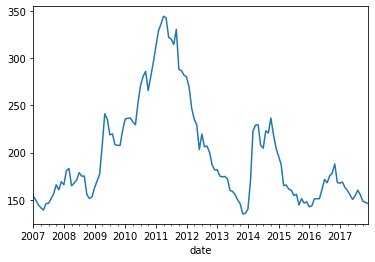

In [61]:
df.inflated['2007':'2017'].plot()

In [62]:
df = prepare.get_data()

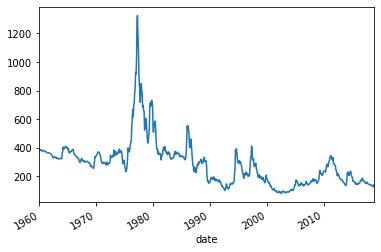

In [64]:
df.inflated.plot()

In [69]:
df['1995':].inflated.mean()

180.143158089042

In [66]:
df.inflated.max()

1324.6101433993401

In [77]:
411/180

2.283333333333333

In [79]:
df['1994':].resample("1Y").max()

,region,mean_precip,mean_temp,min_temp,price,quantity,inflated
date,,,,,,,
1994-12-31,Valle,2.350000,91.000000,77.0,231.880000,1764.0,392.892653
1995-12-31,Valle,1.870000,88.500000,77.0,187.670000,2190.0,309.220805
1996-12-31,Valle,2.226667,88.000000,77.0,143.190000,2081.0,229.165146
1997-12-31,Valle,1.526250,90.000000,77.0,262.920000,1314.0,411.346121
1998-12-31,Valle,2.320000,90.000000,77.0,189.170000,1666.0,291.422768
1999-12-31,Valle,0.931429,87.846154,75.0,138.190000,890.0,208.286172
2000-12-31,Valle,1.279000,87.500000,77.0,126.560000,1366.0,184.553437
2001-12-31,Valle,2.400000,90.100000,76.0,81.360000,1537.0,115.358924
2002-12-31,Valle,2.348750,89.714286,76.0,70.021667,1380.0,97.737247


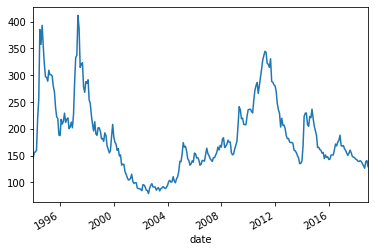

In [78]:
df["1994":].inflated.plot()